In [ ]:
(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering Please downlad the dataset by using the following link. https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones (You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, DBSCAN, Hierarchical clustering.

You can refer to of the codes from the follwing link below. https://www.kaggle.com/karthik3890/text-clustering

In [88]:
import pandas as pd
#loading the csv file
amazonDF = pd.read_csv("Downloads/Amazon_Unlocked_Mobile.csv")
# getting top 5000 records
amazonDF = amazonDF.head(5000)
amazonDF

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
4995,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,5,This review is not for the product as you may ...,64.0
4996,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,4,The product was in good structure. I'm still n...,0.0
4997,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,1,The iPhone was fine. It works and is in good c...,157.0
4998,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,2,Screen cracked really quick.,0.0


In [89]:
# .shape returns a tuple representing the dimensionality
amazonDF.shape

(5000, 6)

In [90]:
# dropna () method removes the rows that contains NULL values
afterNullValuesRemoval = amazonDF.dropna()

In [91]:
# .shape returns a tuple representing the dimensionality
afterNullValuesRemoval.shape

(3422, 6)

In [ ]:
Visualizing Ratings

C:\Users\LaptopCheckout\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

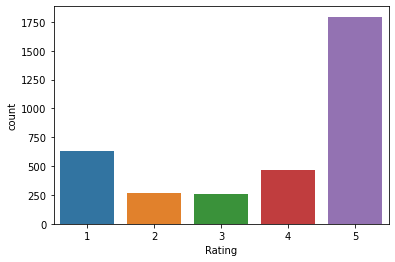

In [93]:
import seaborn as sns
# plotting graph with values from rating column
sns.countplot(afterNullValuesRemoval.Rating)

In [94]:
def classificationReview(rating):
    if rating < 3:
        return 'negative'
    return 'positive'
# mapping based on rating
classificationRating = afterNullValuesRemoval['Rating'].map(classificationReview) 
# loading into data frame
afterNullValuesRemoval['Rating'] = classificationRating

<ipython-input-94-8818c1ece494>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afterNullValuesRemoval['Rating'] = classificationRating


In [95]:
# value_counts is used to get a Series containing counts of unique values
afterNullValuesRemoval['Rating'].value_counts()

positive    2522
negative     900
Name: Rating, dtype: int64

In [ ]:
Data Cleaning

C:\Users\LaptopCheckout\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

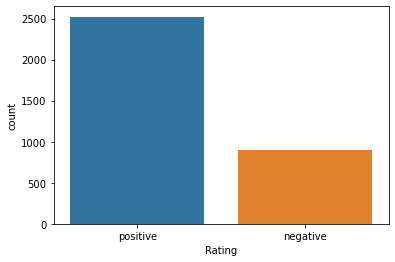

In [97]:
import seaborn as sns
# plotting graph with values from rating column
sns.countplot(afterNullValuesRemoval.Rating)

In [98]:
import re
# re used for string searching and manipulation
counter = 0;
for review in afterNullValuesRemoval['Reviews'].values:
    if (len(re.findall('<.*?>', review))):
        print(counter)
        
        print(review)
        break;
    counter += 1;


3205
Unless you know how to jail break this phone... what's the point? Most apps don't support this old phone. <(it's not really old, they just want you to spend money on the newer version. wtf? but whatever)>


In [99]:
def clean(sentence):
#  compile the regular expression
    clean = re.compile('<.*?>')
# sub replaces one or many matches with a strin
    cleanText = re.sub(clean, ' ', sentence)
    return cleanText


In [100]:
# re used for string searching and manipulation
import re
# loading cleaned text column into data frame
afterNullValuesRemoval['CleanText'] = afterNullValuesRemoval['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))

afterNullValuesRemoval['CleanText'] = afterNullValuesRemoval['CleanText'].apply(lambda x: clean(x))
afterNullValuesRemoval['CleanText'] = afterNullValuesRemoval['CleanText'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))


<ipython-input-100-d30a91a7fd43>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afterNullValuesRemoval['CleanText'] = afterNullValuesRemoval['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
<ipython-input-100-d30a91a7fd43>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afterNullValuesRemoval['CleanText'] = afterNullValuesRemoval['CleanText'].apply(lambda x: clean(x))
<ipython-input-100-d30a91a7fd43>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [101]:

import nltk
# download stopWords from nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords = stopwords.words('english')
# removed stop words
afterNullValuesRemoval['CleanText'] = afterNullValuesRemoval['CleanText'].apply(lambda x: " ".join(x for x in x.split() if x not in stopWords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LaptopCheckout\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-101-2c9f615eedd1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afterNullValuesRemoval['CleanText'] = afterNullValuesRemoval['CleanText'].apply(lambda x: " ".join(x for x in x.split() if x not in stopWords))


In [ ]:
K Means Using Bag of Words

In [105]:
from sklearn.feature_extraction.text import CountVectorizer
#  Countvectorizer is a method to convert text to numerical data
countVector = CountVectorizer()
#  fit_transform() is used on the training data so that we can scale the training data
transform = countVector.fit_transform(afterNullValuesRemoval['CleanText'].values)


In [106]:
column_names = countVector.get_feature_names()

In [107]:
from sklearn.cluster import KMeans
# K Means is one of the simplest and most popular unsupervised machine learning algorithms
kMMOdel = KMeans(n_clusters = 10, init='k-means++', n_jobs = -1, random_state=99)
# fit is for clearing any attributes already stored on the estimator
kMMOdel.fit(transform)


C:\Users\LaptopCheckout\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=10, n_jobs=-1, random_state=99)

In [109]:
KMlabels = kMMOdel.labels_
# applying kmeans clustering
clusterCenter = kMMOdel.cluster_centers_
clusterCenter


array([[0.0031348 , 0.        , 0.        , ..., 0.00089566, 0.        ,
        0.        ],
       [0.00985915, 0.00140845, 0.0028169 , ..., 0.0028169 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02258065, 0.        , 0.00645161, ..., 0.00322581, 0.00645161,
        0.00967742],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [110]:
from sklearn import metrics
#  metrics is released as a Python package for machine learning
silhouetteScore = metrics.silhouette_score(transform, KMlabels, metric='euclidean')
silhouetteScore


0.19659068487820835

In [111]:
dataframe = afterNullValuesRemoval

dataframe['BowLabel'] = kMMOdel.labels_
#getting count of reviews
dataframe.groupby(['BowLabel'])['Reviews'].count()

<ipython-input-111-b7729057bea8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['BowLabel'] = kMMOdel.labels_


BowLabel
0    2233
1     710
2       1
3     141
4      20
5       3
6       1
7       1
8     310
9       2
Name: Reviews, dtype: int64

In [112]:
centroids = kMMOdel.cluster_centers_.argsort()[:, ::-1]
# getting feature names of vector
featureNames = countVector.get_feature_names()
print("Top terms per cluster:")
for i in range(10):
# getting each cluster value
    print("Cluster %d:" % i, end='')
    for single in centroids[i, :10]:
# getting centroids and loading in array
        print(' %s' % featureNames[single], end='')
        print()


Top terms per cluster:
Cluster 0: phone
 great
 good
 works
 price
 screen
 like
 love
 work
 one
Cluster 1: phone
 great
 screen
 good
 one
 price
 work
 use
 would
 new
Cluster 2: phone
 issues
 great
 lte
 software
 good
 gps
 annoying
 youtube
 turned
Cluster 3: phone
 screen
 good
 use
 one
 like
 great
 battery
 sim
 camera
Cluster 4: phone
 screen
 like
 camera
 one
 battery
 good
 use
 would
 get
Cluster 5: phone
 screen
 data
 tracfone
 like
 android
 alcatel
 good
 really
 time
Cluster 6: phone
 note
 one
 even
 would
 sd
 dollar
 compared
 card
 screen
Cluster 7: phone
 quality
 good
 one
 like
 moto
 camera
 light
 display
 experience
Cluster 8: phone
 screen
 good
 great
 one
 like
 camera
 would
 battery
 get
Cluster 9: phone
 camera
 like
 idol
 sound
 one
 screen
 feature
 use
 price


In [ ]:
K Means using Average Words to Vectors

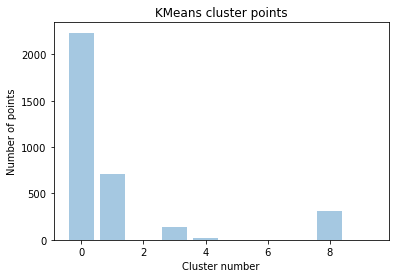

In [113]:
import matplotlib.pyplot as plt
#plt to plot graphs
plt.bar([x for x in range(10)], dataframe.groupby(['BowLabel'])['Reviews'].count(), alpha = 0.4)
# providing title
plt.title('KMeans cluster points')
# label on xaxis
plt.xlabel("Cluster number")
#label on yaxis
plt.ylabel("Number of points")
plt.show()


In [114]:
sentencesList = []
# splitting the sentences and adding into an array
for sent in afterNullValuesRemoval['CleanText'].values:
    sentencesList.append(sent.split())


In [115]:
pip install -U gensim

Note: you may need to restart the kernel to use updated packages.


In [116]:
import gensim
# Gensim is a Python library for topic modelling, document indexing 
w2v_model=gensim.models.Word2Vec(sentencesList, workers=4)

In [117]:
import numpy as np
sentenceVectors = []
for sentence in sentencesList:
  sentVec = np.zeros(100)
  wordsCounter = 0
# taking each word from sentence
  for word in sentence:
    try:
      vec = w2v_model.wv[word]
      sentVec += vec
      wordsCounter += 1
    except:
      pass
# diving the value with words counter
  sentVec /= wordsCounter
  sentenceVectors.append(sentVec)
#loading values from np
sentenceVectors = np.array(sentenceVectors)
sentenceVectors = np.nan_to_num(sentenceVectors)
# .shape returns a tuple representing the dimensionality
sentenceVectors.shape


<ipython-input-117-20f8cd5408b9>:15: RuntimeWarning: invalid value encountered in true_divide
  sentVec /= wordsCounter


(3422, 100)

In [118]:
cluster = [x for x in range(3,11)]
#printing cluster
cluster

[3, 4, 5, 6, 7, 8, 9, 10]

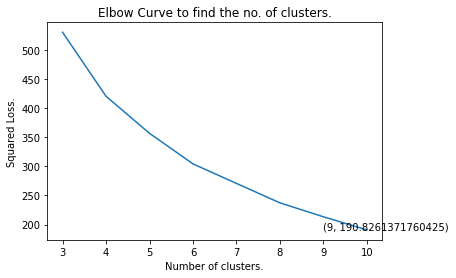

In [119]:
# initialising an array for squaredLoss
squaredLoss = []
for clus in cluster:
# fit is for clearing any attributes already stored on the estimator
    kmeans = KMeans(n_clusters = clus).fit(sentenceVectors)
    squaredLoss.append(kmeans.inertia_)
# taking values from np associated with calculated squared loss
clustersOptimal = np.argmin(squaredLoss) + 2 
plt.plot(cluster, squaredLoss)
# grap label
plt.title("Elbow Curve to find the no. of clusters.")
# label for xaxis
plt.xlabel("Number of clusters.")
# label for yaxis
plt.ylabel("Squared Loss.")
axis = (clustersOptimal, min(squaredLoss))
plt.annotate('(%s, %s)' % axis, xy = axis, textcoords='data')
#ploting the graph
plt.show()


In [120]:
#printing the obtained values
print ("The optimal number of clusters obtained is - ", clustersOptimal)
print ("The loss for optimal cluster is - ", min(squaredLoss))


The optimal number of clusters obtained is -  9
The loss for optimal cluster is -  190.8261371760425


In [121]:
from sklearn.cluster import KMeans
# considering kmeans cluster from sklearn
KMModel2 = KMeans(n_clusters = clustersOptimal)
# fit is for clearing any attributes already stored on the estimator
KMModel2.fit(sentenceVectors)


KMeans(n_clusters=9)

In [122]:
# considering cluster center values and storing in an array
wordClusterCenter = KMModel2.cluster_centers_

wordClusterCenter[1:2]

array([[-0.04354285,  0.25346344,  0.08210009, -0.03903585,  0.1972532 ,
        -0.43794573,  0.05819629,  0.61258845, -0.34875081, -0.12586199,
        -0.21322639, -0.4071037 ,  0.08425427,  0.22035757,  0.27346867,
        -0.27725145,  0.11240274, -0.18764954, -0.05457514, -0.52013387,
         0.24656276,  0.11159373,  0.04892018, -0.25822135, -0.08731642,
         0.04224569, -0.36319393, -0.01466286, -0.30399166, -0.14554939,
         0.26457341,  0.06330916, -0.02298469, -0.34542374, -0.16584427,
         0.38783473,  0.13322816, -0.24402414, -0.03741891, -0.64115445,
        -0.02812412, -0.35263853,  0.01047588,  0.07943349,  0.06296272,
         0.0378141 , -0.40943995,  0.18806528,  0.40564678,  0.09866038,
         0.0516443 , -0.09232301, -0.0199586 , -0.03852425, -0.49336396,
         0.32254454,  0.21839571, -0.04269088, -0.30331637,  0.15413955,
         0.11085495,  0.48755903, -0.36149037, -0.03609876, -0.3122939 ,
         0.08263844,  0.05044031,  0.27885564, -0.2

In [136]:
for i in range(4):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(dataframe.iloc[dataframe.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(dataframe.iloc[dataframe.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
It works good but it goes slow sometimes but its a very good phone I love it


Ordered this phone as a replacement for the same model until my contract expires and I can get a new one. Seller confirmation said delivery could take up to 7 days. Seller sent out the phone within hours of receiving the order and I had the phone the next day. Phone looks better than described was able to transfer data from the old one to the new one with no problems. Highly recommend this seller


______________________________________________________________________
A review of assigned to cluster  1
----------------------------------------------------------------------
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Than

In [ ]:
DBSCAN Clustering

In [123]:

from sklearn.cluster import DBSCAN
#  Density-Based Spatial Clustering of Applications with Noise
minmumPoints = 2 * 100
# deifing lower bound with inputs
def lBound(numbers, target):
#     loading values to a and b
    a, b = 0, len(numbers) - 1
    while a <= b:
# finding middle term
        middle = int(a + (b - a) / 2)
        if numbers[middle] >= target:
            b = middle - 1
        else:
            a = middle + 1
    return a

def nearestNeighbour200thCompute(term, data):
    nearNeigh = []
    for item in data:
# fining sum to the power 2
        dist = np.sum((term - item) **2 )
# comparing with above found value
        if(len(nearNeigh) == 200 and nearNeigh[199] > dist):
            l = int(lBound(nearNeigh, dist))
            if l < 200 and l >= 0 and nearNeigh[l] > dist:
                nearNeigh[l] = dist
        else:
            nearNeigh.append(dist)
            nearNeigh.sort()
#returing 200th value 
    return nearNeigh[199]

In [124]:
neigh200th = []
# getting each item from sentence vectors and appending to array
for item in sentenceVectors[:1500]:
    neigh200th.append( nearestNeighbour200thCompute(item, sentenceVectors[:1500]) )
#sorting the array
neigh200th.sort()

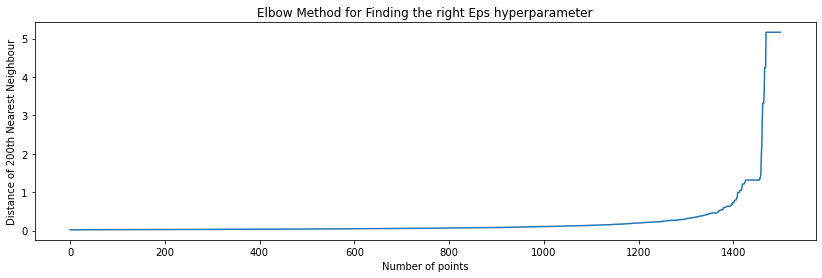

In [125]:
# plotting the figure with size specified
plt.figure(figsize=(14,4))
# title for graph
plt.title("Elbow Method for Finding the right Eps hyperparameter")
# params for potting the graph
plt.plot([x for x in range(len(neigh200th))], neigh200th)
# giving heading to x axis
plt.xlabel("Number of points")
# giving heading to y axis
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [126]:
#  Density-Based Spatial Clustering of Applications with Noise
dbscanModel = DBSCAN(eps = 5, min_samples = minmumPoints, n_jobs=-1)
# fit is for clearing any attributes already stored on the estimator
dbscanModel.fit(sentenceVectors)


DBSCAN(eps=5, min_samples=200, n_jobs=-1)

In [127]:
# loading the dataframe
dbscanDF = dataframe
# loading labels into the data frame
dbscanDF['AVG-W2V Clus Label'] = dbscanModel.labels_
# grouping by Product Name, Brand Name, Reviews
dbscanDF.groupby(['AVG-W2V Clus Label'])['Product Name', 'Brand Name', 'Reviews'].count()


<ipython-input-127-8150695bb5e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbscanDF['AVG-W2V Clus Label'] = dbscanModel.labels_
<ipython-input-127-8150695bb5e3>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dbscanDF.groupby(['AVG-W2V Clus Label'])['Product Name', 'Brand Name', 'Reviews'].count()


,Product Name,Brand Name,Reviews
AVG-W2V Clus Label,,,
0,3422,3422,3422


In [ ]:
Hierarichal Clustering

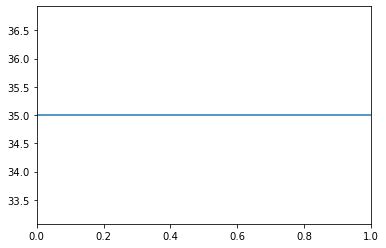

In [129]:
import scipy
#  SciPy wraps highly-optimized implementations written in low-level languages
from scipy.cluster import hierarchy
plt.axhline(y=35)


In [130]:
from sklearn.cluster import AgglomerativeClustering
# Recursively merges pair of clusters of sample data
clusterA = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
#  fit_predict() is more relevant to unsupervised or transductive estimators
AggClus = clusterA.fit_predict(sentenceVectors)


In [131]:
hierarchydf = dbscanDF
# loading labels cluster
hierarchydf['AVG-W2V Clus Label'] = clusterA.labels_


<ipython-input-131-41888e4dae09>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hierarchydf['AVG-W2V Clus Label'] = clusterA.labels_


In [132]:
# count of clusters
hierarchydf.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0     621
1    1901
2     317
3      61
4     522
Name: Reviews, dtype: int64

In [135]:
for i in range(5):
    print("2 reviews", i)
    print("-" * 70)
    print(hierarchydf.iloc[hierarchydf.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(hierarchydf.iloc[hierarchydf.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)


2 reviews 0
----------------------------------------------------------------------
It works good but it goes slow sometimes but its a very good phone I love it


Ordered this phone as a replacement for the same model until my contract expires and I can get a new one. Seller confirmation said delivery could take up to 7 days. Seller sent out the phone within hours of receiving the order and I had the phone the next day. Phone looks better than described was able to transfer data from the old one to the new one with no problems. Highly recommend this seller


______________________________________________________________________
2 reviews 1
----------------------------------------------------------------------
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your h

In [ ]:
In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In [ ]:
We can conclude from above outputs that K Mean clustering can handle big data in a better way compared to Hierarchical clustering.
A hierarchical clustering is a tree-like arrangement of nested clusters. When the cluster structure is hyper spherical, K Means clustering is shown to perform effectively.
In contrast to DBScan Clustering, K-means clustering is sensitive to the amount of clusters provided. For big datasets, K-means Clustering is more efficient, but DBScan Clustering struggles with high-dimensional datasets.
The dendrogram of hierarchical clustering makes calculating the number of clusters easier. K-means computes quicker when there are a lot of variables. If the distinctions are made based on previous assumptions, hierarchical clustering should
be utilized to figure out how many groups there are.

In [ ]:
(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct 10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.

The dataset can be download from here: https://github.com/unt-iialab/info5731_spring2021/blob/main/class_exercises/exercise09_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.

Algorithms:

(1) MultinominalNB

(2) SVM

(3) KNN

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison

(4) F-1 score

In [48]:
import pandas as pd 
import re 
import nltk 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from sklearn.feature_extraction.text import CountVectorizer 
# loading stsa-train 
train = pd.read_csv("Downloads/stsa-train.txt", sep='delimiter', header=None)              
train = pd.DataFrame(train) 
# getting the text and reviews columns
train.columns = ["Text"] 
train['Reviews'] = train['Text'].str.split(' ').str[0]
#train dataset  
train['Text'] = train['Text'].str.split(n=1).str[1]
train

<ipython-input-48-4e935ab7b805>:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train = pd.read_csv("Downloads/stsa-train.txt", sep='delimiter', header=None)


,Text,Reviews
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting-room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1
...,...,...
6915,"painful , horrifying and oppressively tragic ,...",1
6916,take care is nicely performed by a quintet of ...,0
6917,"the script covers huge , heavy topics in a bla...",0
6918,a seriously bad film with seriously warped log...,0


In [50]:
# loading stsa-txt 
test = pd.read_csv("Downloads/stsa-test.txt", sep='delimiter', header=None)        
test = pd.DataFrame(test) 
# getting the text and reviews columns
test.columns = ["Text"] 
test['Reviews'] = test['Text'].str.split(' ').str[0]
#test dataset  
test['Text'] = test['Text'].str.split(n=1).str[1]
test

<ipython-input-50-d4524e2c4ab7>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test = pd.read_csv("Downloads/stsa-test.txt", sep='delimiter', header=None)


,Text,Reviews
0,"no movement , no yuks , not much of anything .",0
1,"a gob of drivel so sickly sweet , even the eag...",0
2,"gangs of new york is an unapologetic mess , wh...",0
3,"we never really feel involved with the story ,...",0
4,this is one of polanski 's best films .,1
...,...,...
1816,"an often-deadly boring , strange reading of a ...",0
1817,the problem with concept films is that if the ...,0
1818,"safe conduct , however ambitious and well-inte...",0
1819,"a film made with as little wit , interest , an...",0


In [52]:
# Cleaning of the data
#  downloading stop words
nltk.download('stopwords') 
#  initialising empty arraya for train and test data
trainData = [] 
testData = []

for i in range(0, 6920): 
    # sub replaces one or many matches with a strin
    data = re.sub('[^a-zA-Z]', '', train['Text'][i]) 
    # string in which all case-based characters have been lowercased 
    data = data.lower() 
#     break down a bigger string into several smaller strings
    data = data.split() 
    ps = PorterStemmer() 
#     joining the text after splitting
    data = ''.join(data) 
    trainData.append(data)

for i in range(0, 1821): 
    # sub replaces one or many matches with a strin
    data = re.sub('[^a-zA-Z]', '', test['Text'][i]) 
    # string in which all case-based characters have been lowercased 
    data = data.lower() 
    #     break down a bigger string into several smaller strings
    data = data.split() 
    ps = PorterStemmer() 
    #     joining the text after splitting
    data = ''.join(data) 
    testData.append(data)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LaptopCheckout\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:

# creating model train data
countVec = CountVectorizer(max_features = 1500) 
  
xValue = countVec.fit_transform(trainData).toarray() 
yValue = train.iloc[:, 1].values

print(yValue)

['1' '0' '0' ... '0' '0' '1']


In [55]:
# splitting into training set and validation set 
from sklearn.model_selection import train_test_split 
  #loading the values
X_train, X_val, y_train, y_val = train_test_split(xValue, yValue, test_size = 0.2, random_state = 0)


In [56]:
#MultinominalNB
# fitting naive bayes to the training set 
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
# fit is for clearing any attributes already stored on the estimator
model = classifier.fit(X_train, y_train)
# predicting test set results 
yPredict = classifier.predict(X_val) 
print(yPredict)

['1' '1' '1' ... '1' '1' '1']


In [57]:
import sklearn.metrics as metrics 
#  metrics is released as a Python package for machine learning
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))


Accuracy: 0.5346820809248555


In [59]:
from sklearn.metrics import classification_report
#  A Classification report is used to measure the quality of predictions
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.00      0.01       646
           1       0.53      1.00      0.70       738

    accuracy                           0.53      1384
   macro avg       0.77      0.50      0.35      1384
weighted avg       0.75      0.53      0.37      1384



In [60]:
from sklearn.model_selection import KFold
# KFOLD is a model validation technique, where it's not using your pre-trained model
kFol = KFold(n_splits=10)
# given number of splits
kFol


KFold(n_splits=10, random_state=None, shuffle=False)

In [62]:
#SVM Model
from sklearn import svm
clasifier = svm.SVC()
# fit is for clearing any attributes already stored on the estimator
modelSVM = clasifier.fit(X_train, y_train)
# perform prediction by taking X value as input
yPredict = clasifier.predict(X_val)
print(yPredict)


['1' '1' '1' ... '1' '1' '1']


In [63]:
#Accuracy from SVM Model
s= modelSVM.score(X_val, y_val)
# printing the accuracy
print("Accuracy:", s )

print(classification_report(y_val, y_pred))


Accuracy: 0.5346820809248555
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       646
           1       0.53      1.00      0.70       738

    accuracy                           0.53      1384
   macro avg       0.77      0.50      0.35      1384
weighted avg       0.75      0.53      0.37      1384



In [64]:
#KNN Model
from sklearn.preprocessing import StandardScaler
# StandardScaler to standardize the data values into a standard format
scaler = StandardScaler()
# fit is for clearing any attributes already stored on the estimator
scaler.fit(X_train)
# transform is when called with a displayable, returns another displayable
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
# fit is for clearing any attributes already stored on the estimator
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [65]:
yPredict = classifier.predict(X_val)
# printing the prediction value
print(yPredict)


['0' '0' '0' ... '0' '0' '0']


In [66]:
from sklearn.metrics import classification_report, confusion_matrix
# confusion_matrix used to evaluate the correctness of a classification model
print(confusion_matrix(y_val, y_pred))


[[646   0]
 [736   2]]


In [67]:
# classification_report used to measure the quality of predictions from a classification algorithm
print(classification_report(y_val, yPredict))


              precision    recall  f1-score   support

           0       0.47      1.00      0.64       646
           1       1.00      0.00      0.01       738

    accuracy                           0.47      1384
   macro avg       0.73      0.50      0.32      1384
weighted avg       0.75      0.47      0.30      1384



In [68]:
#Decision tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
# assigning the classifier
classifier = DecisionTreeClassifier()
# fit is for clearing any attributes already stored on the estimator
classifier = classifier.fit(X_train,y_train)
#To Predict the response for test dataset
yPredict = classifier.predict(X_val)
print(y_pred)


['1' '1' '1' ... '1' '1' '1']


In [69]:
print("Accuracy:",metrics.accuracy_score(y_val, yPredict))
# classification report with inputs
print(classification_report(y_val, y_pred))


Accuracy: 0.5346820809248555
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       646
           1       0.53      1.00      0.70       738

    accuracy                           0.53      1384
   macro avg       0.77      0.50      0.35      1384
weighted avg       0.75      0.53      0.37      1384



In [70]:
#Random Forest
# To import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets 
# fit is for clearing any attributes already stored on the estimator
classifier.fit(X_train,y_train)
#getting classifier predict value
yPredict=classifier.predict(X_val)
yPredict


array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [71]:
from sklearn import metrics
#  metrics is released as a Python package for machine learning
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
# classification report with inputs
print(classification_report(y_val, y_pred))


Accuracy: 0.5346820809248555
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       646
           1       0.53      1.00      0.70       738

    accuracy                           0.53      1384
   macro avg       0.77      0.50      0.35      1384
weighted avg       0.75      0.53      0.37      1384



In [75]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [76]:
#XGBoost
import xgboost as xgb
import numpy as np
# the XGBoost python module is able to load data from many types of different formats
xgb = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
# fit is for clearing any attributes already stored on the estimator
xgb.fit(X_train,y_train)


[01:15:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=8,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [77]:
# predict value with XGBoost
predict = xg.predict(X_val)
predict


array([0.5114447, 0.5114447, 0.5114447, ..., 0.5114447, 0.5114447,
       0.5114447], dtype=float32)

In [78]:
from sklearn.metrics import mean_squared_error
# tells you how close a regression line is to a set of points
meanError = np.sqrt(mean_squared_error(y_val, pred))
# printing the mean squared error
print("RMSE: %f" % (meanError))


RMSE: 0.499369
